<a href="https://colab.research.google.com/github/NadimMahmud3219/Material-Health-analysis-and-risk-prediction/blob/main/Maternal_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

In [ ]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [ ]:
df.shape

(1014, 7)

In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


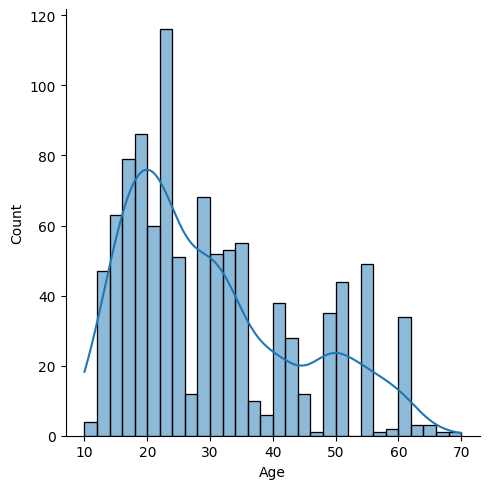

In [ ]:
sns.displot(df['Age'],kde = True,bins = 30)

<Axes: >

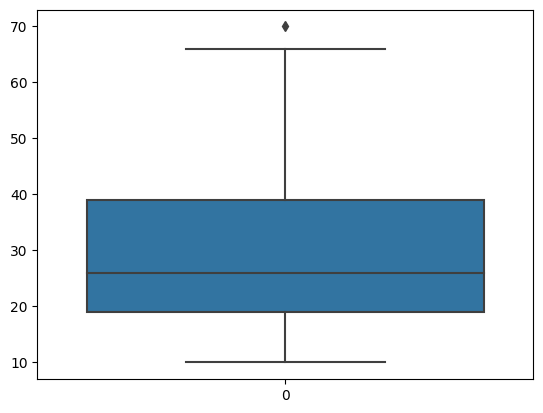

In [ ]:
sns.boxplot(df['Age'])

<Axes: xlabel='RiskLevel', ylabel='count'>

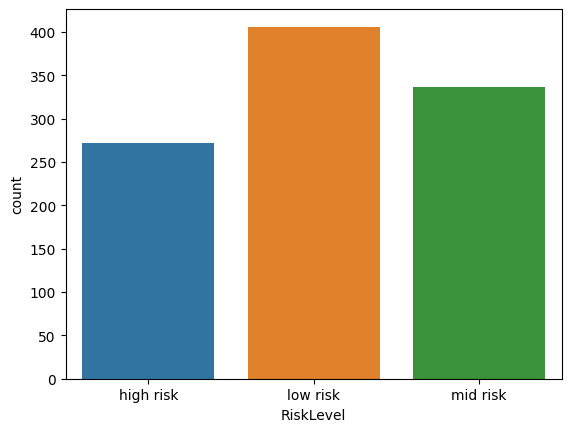

In [ ]:
sns.countplot(data=df,x='RiskLevel')

<Axes: xlabel='RiskLevel', ylabel='Age'>

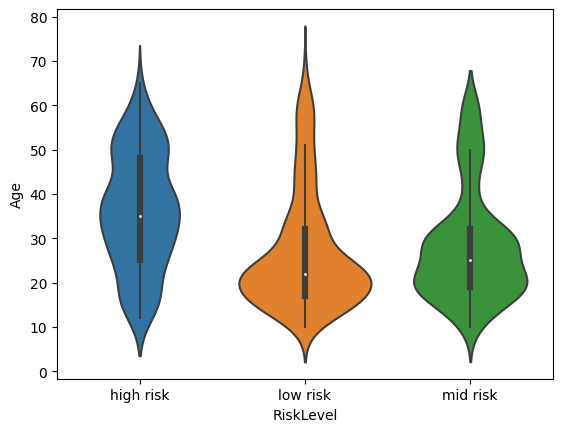

In [ ]:
sns.violinplot(x='RiskLevel',y='Age',data=df)

<Axes: xlabel='RiskLevel', ylabel='SystolicBP'>

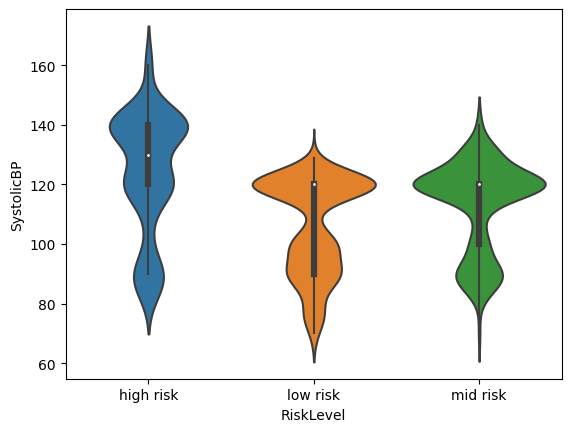

In [ ]:
sns.violinplot(x='RiskLevel',y='SystolicBP',data=df)

<Axes: xlabel='RiskLevel', ylabel='DiastolicBP'>

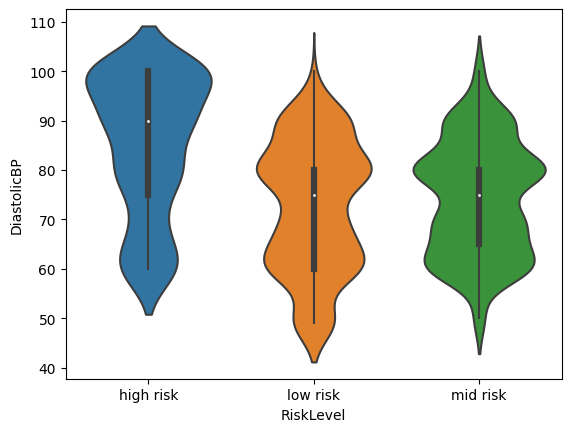

In [ ]:
sns.violinplot(x='RiskLevel',y='DiastolicBP',data=df)

<Axes: xlabel='RiskLevel', ylabel='BS'>

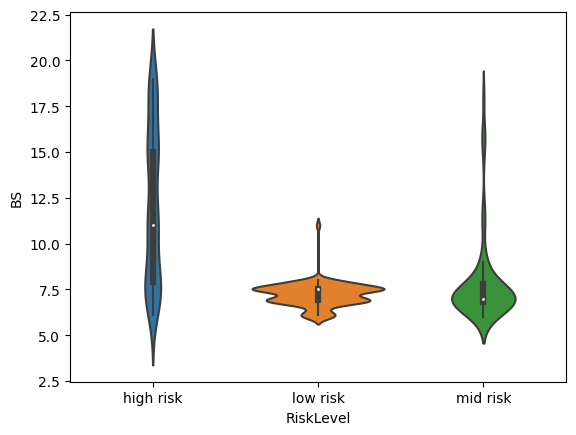

In [ ]:
sns.violinplot(x='RiskLevel',y='BS',data=df)

<Axes: xlabel='RiskLevel', ylabel='HeartRate'>

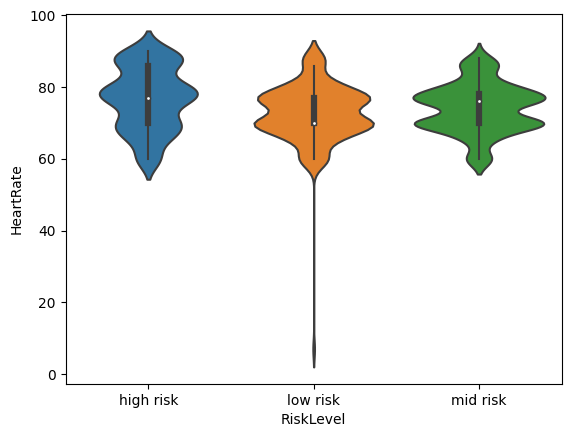

In [ ]:
sns.violinplot(x='RiskLevel',y='HeartRate',data=df)

<Axes: xlabel='RiskLevel', ylabel='BodyTemp'>

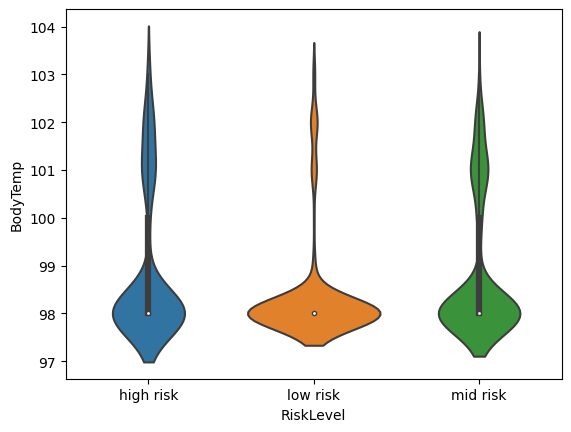

In [ ]:
sns.violinplot(x='RiskLevel',y='BodyTemp',data=df)

In [ ]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

In [ ]:
df['RiskLevel'] = Encoder.fit_transform(df['RiskLevel'])

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


<Axes: >

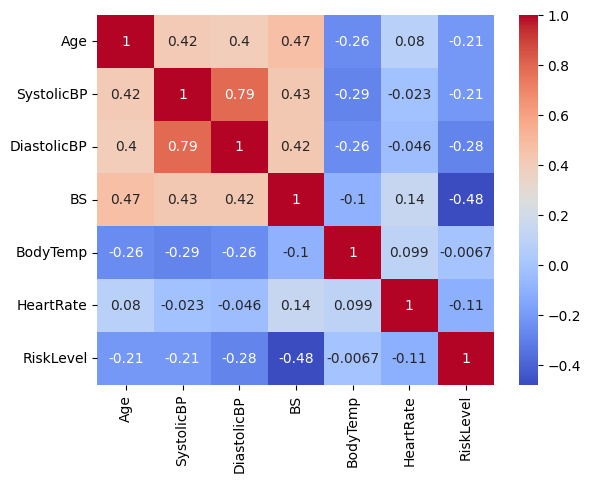

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap=('coolwarm'))

In [ ]:
filt= df['SystolicBP']>120
newdf = pd.DataFrame(df[filt])

In [ ]:
newdf['RiskLevel'].value_counts()

0    140
2     53
1      1
Name: RiskLevel, dtype: int64

In [ ]:
filt= df['SystolicBP']<100
newdf = pd.DataFrame(df[filt])
newdf['RiskLevel'].value_counts()

1    130
2     73
0     49
Name: RiskLevel, dtype: int64

In [ ]:

filt= df['DiastolicBP']>80
newdf1 = pd.DataFrame(df[filt])
newdf1['RiskLevel'].value_counts()

0    161
1     93
2     72
Name: RiskLevel, dtype: int64

In [ ]:

filt= df['DiastolicBP']<80
newdf1 = pd.DataFrame(df[filt])
newdf1['RiskLevel'].value_counts()

1    217
2    172
0     73
Name: RiskLevel, dtype: int64

In [ ]:
x=df.drop(columns=['RiskLevel'],axis=1)
y =df['RiskLevel']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=101,shuffle= True)

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
predictions = model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        74
           1       0.87      0.82      0.85       100
           2       0.79      0.75      0.77        80

    accuracy                           0.83       254
   macro avg       0.83      0.84      0.83       254
weighted avg       0.83      0.83      0.83       254



In [ ]:
print(confusion_matrix(ytest,predictions))

[[70  2  2]
 [ 4 82 14]
 [10 10 60]]


In [ ]:
x_train_prediction = model.predict(xtrain)
accuracy = accuracy_score(ytest,predictions)


In [ ]:
print(accuracy)

0.8346456692913385


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=300)

In [ ]:
predictions2 = rfc.predict(xtest)

In [ ]:
print(classification_report(ytest,predictions2))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        74
           1       0.86      0.82      0.84       100
           2       0.75      0.76      0.76        80

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



In [ ]:
print(confusion_matrix(ytest,predictions2))

[[67  3  4]
 [ 2 82 16]
 [ 9 10 61]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
prediction3 = knn.predict(xtest)

In [ ]:
print(classification_report(ytest,prediction3))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        74
           1       0.79      0.78      0.78       100
           2       0.72      0.80      0.76        80

    accuracy                           0.79       254
   macro avg       0.80      0.79      0.79       254
weighted avg       0.79      0.79      0.79       254



In [ ]:
print(confusion_matrix(ytest,prediction3))

[[58 11  5]
 [ 2 78 20]
 [ 6 10 64]]


In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    predict_i=knn.predict(xtest)
    error_rate.append(np.mean(predict_i != ytest))

Text(0, 0.5, 'Error Rate')

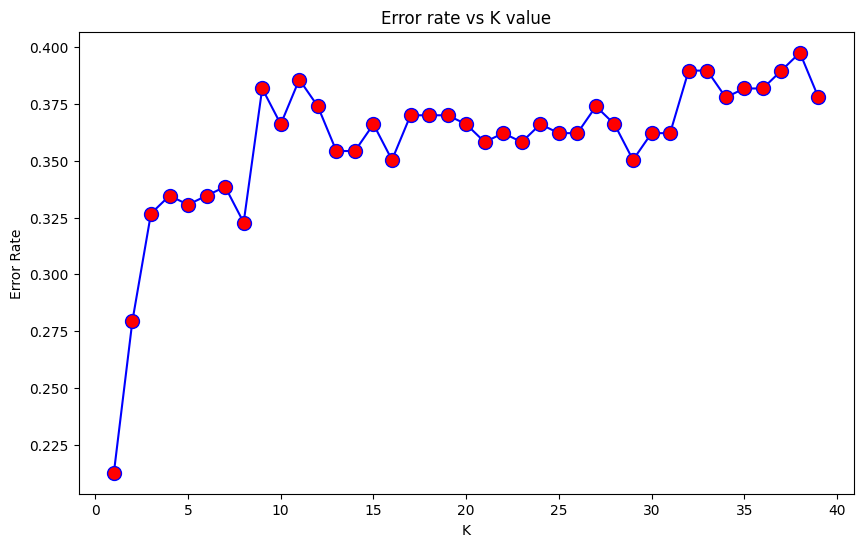

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue' ,marker='o',
         markerfacecolor ='red',markersize=10)
plt.title("Error rate vs K value")
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(xtrain,ytrain)

SVC()

In [ ]:
prediction = SVC_model.predict(xtest)

In [ ]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73        74
           1       0.54      0.96      0.69       100
           2       0.70      0.17      0.28        80

    accuracy                           0.62       254
   macro avg       0.69      0.59      0.57       254
weighted avg       0.68      0.62      0.57       254



In [ ]:
print(confusion_matrix(ytest,prediction))

[[48 24  2]
 [ 0 96  4]
 [ 9 57 14]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
new_grid = {'C':[0.1,1,5,10,100,1000],'gamma':[1,0.1,0.001,0.0001,0.00001,0.0000001]}

In [ ]:
grid = GridSearchCV(SVC(),new_grid,verbose=3)

In [ ]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.441 total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.434 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.421 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.441 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.447 total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.441 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.454 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.434 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.441 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.447 total time=   0.1s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.599 total time=   0.1s
[CV 2/5] END ................C=0.1, gamma=0.001

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05, 1e-07]},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 1}

In [ ]:
grid_predict = grid.predict(xtest)

In [ ]:
print(confusion_matrix(ytest,grid_predict))
print('\n')
print(classification_report(ytest,grid_predict))

[[60 11  3]
 [ 1 87 12]
 [ 6 20 54]]


              precision    recall  f1-score   support

           0       0.90      0.81      0.85        74
           1       0.74      0.87      0.80       100
           2       0.78      0.68      0.72        80

    accuracy                           0.79       254
   macro avg       0.81      0.79      0.79       254
weighted avg       0.80      0.79      0.79       254



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
print(confusion_matrix)

[[50 15  9]
 [ 3 85 12]
 [12 49 19]]


In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        74
           1       0.57      0.85      0.68       100
           2       0.47      0.24      0.32        80

    accuracy                           0.61       254
   macro avg       0.60      0.59      0.57       254
weighted avg       0.60      0.61      0.58       254

